<a href="https://colab.research.google.com/github/salimahdiyyah/Dashboard/blob/main/Salimah_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama: Salimah Mahdiyyah
- Email: salimahdiyyah03@gmail.com
- Id Dicoding: sellyslmh

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?
- pertanyaan 3: Berdasarkan kota bagian mana yang menghasilkan pendapatan tertinggi?
- pertanyaan 4: Metode pembayaran apa yang paling umum digunakan oleh pelanggan?
- pertanyaan 5: Bagaimana distribusi dari review score?

## Menyiapkan semua library yang dibutuhkan

In [114]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [115]:
customers_df = pd.read_csv("/content/sample_data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [116]:
geo_df = pd.read_csv("/content/sample_data/geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [117]:
order_items_df = pd.read_csv("/content/sample_data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [118]:
order_pay_df = pd.read_csv("/content/sample_data/order_payments_dataset.csv")
order_pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [119]:
order_reviews_df = pd.read_csv("/content/sample_data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [120]:
orders_df = pd.read_csv("/content/sample_data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [121]:
product_catnam_df = pd.read_csv("/content/sample_data/product_category_name_translation.csv")
product_catnam_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [122]:
products_df = pd.read_csv("/content/sample_data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [123]:
sellers_df = pd.read_csv("/content/sample_data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [124]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [125]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [126]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [127]:
geo_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [128]:
print("Jumlah duplikasi: ", geo_df.duplicated().sum())

geo_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [129]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [130]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [131]:
order_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [132]:
print("Jumlah duplikasi: ", order_pay_df.duplicated().sum())

order_pay_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [133]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [134]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [135]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [136]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [137]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [138]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [139]:
product_catnam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [140]:
print("Jumlah duplikasi: ", product_catnam_df.duplicated().sum())

product_catnam_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [141]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [142]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### membersihkan duplikat

In [143]:
geo_df.duplicated().sum()

261831

In [144]:
geo_df.drop_duplicates(inplace=True)

print("Jumlah duplikasi: ", geo_df.duplicated().sum())

Jumlah duplikasi:  0


In [145]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [146]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [147]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [148]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [149]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [150]:
datetime_columns = ["review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [151]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  object        
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB


In [152]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [153]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [154]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [155]:
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [156]:
order_reviews_df.fillna(value="Recomendo", inplace=True)

In [157]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [158]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [159]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [160]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [161]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [162]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [163]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [164]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [165]:
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [166]:
orders_df.fillna(value="2018-02-27 04:31:10", inplace=True)

In [167]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [168]:
orders_df.describe()

<ipython-input-168-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-168-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-168-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-168-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categ

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2017-12-20 00:00:00
freq,1,1,96478,3,169,1783,2965,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


## Exploratory Data Analysis (EDA)

### Explore ...

In [169]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
92140,e3e5c15c73942261d698533066c9c3d8,2a34af7c4b1b83d78b14cf6b9c32c3b9,5303,sao paulo,SP
16058,f1a2fe3e3ccdd6c22c7b98d1bcd4a427,f34cd460ef8b2c308b4501f0f83e7202,82590,curitiba,PR
51517,1432c42a35c00d1c9415db9c40ff472a,59fa9689b7269e99c19b967e1b94c36b,90850,porto alegre,RS
28919,0a8063db2632efe502814c8917d7b4a6,4aab13ab7f6f9109fa6a996ff4b2cf4e,14680,jardinopolis,SP
37357,e37441c531a1f8693c41af79875a123f,eed42da7ee2f3ce26ab52758e63d855f,13276,valinhos,SP


In [170]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [171]:
customers_df.customer_id.is_unique

True

In [172]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [173]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [174]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [175]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
54073,8b31141d6a9f3bb71baa36281157a9a8,99ef70ecdfc7f7d28ea4c3538df4e84b,delivered,2018-01-05 13:47:50,2018-01-05 13:58:24,2018-01-05 21:33:59,2018-01-10 22:21:00,2018-01-30
57265,b90e14223088b3ffba011828a64a73ca,28b2a01812347760419e5a982fa418d0,delivered,2017-05-07 11:19:44,2017-05-07 11:30:17,2017-05-09 15:38:06,2017-05-18 11:49:56,2017-05-29
48894,d7343b3b63fe9f2256b9508ea75c5cc5,15d24ce77080f76f2fd8a982dc9a2a70,delivered,2017-11-24 00:10:13,2017-11-25 05:49:44,2017-11-27 12:19:43,2017-12-06 18:51:54,2017-12-14
19332,00526a9d4ebde463baee25f386963ddc,5848ef3f994e18c5121d291e0daedc81,delivered,2018-08-07 22:03:44,2018-08-07 22:15:22,2018-08-08 14:11:00,2018-08-16 19:58:24,2018-08-15
53095,0b382db57a557ff7703eaba5e991e7fb,0732c0881c70ebcda536a4b14e9db106,delivered,2017-11-02 12:04:56,2017-11-02 12:15:31,2017-11-03 22:25:52,2017-11-13 19:28:45,2017-11-29


In [176]:
orders_df['delayed'] = (orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date'])
orders_df['delay_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']
orders_df['total_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']
orders_df['prepare_time'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delay_time,total_time,prepare_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,False,-8 days +21:25:13,8 days 10:17:58,2 days 08:47:45
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,False,-6 days +15:27:45,12 days 12:03:18,0 days 11:06:33


In [177]:
orders_df.describe(include="all")

<ipython-input-177-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-177-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-177-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-177-903538279252>:1: FutureW

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delay_time,total_time,prepare_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81019,95665,459,2,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2017-12-20 00:00:00,False,NaN,NaN,NaN
freq,1,1,96478,3,169,1783,2965,522,89688,NaN,NaN,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9 days +16:16:12.746281715,14 days 22:36:24.887621805,4 days 23:57:00.451976549
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34 days 10:31:07.602311764,34 days 04:21:53.846634695,28 days 01:37:50.733425799
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-258 days +04:31:10,-393 days +13:44:51,-398 days +10:25:40
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17 days +17:38:52,6 days 06:36:06,0 days 20:58:44


In [178]:
orders_df = orders_df[(orders_df["order_status"] == "delivered")].reset_index(drop=True)
orders_df.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [179]:
order_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [180]:
payment_df = pd.merge(
    left=orders_df,
    right=order_pay_df,
    on="order_id",
    how="inner"
)
payment_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delay_time,total_time,prepare_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,False,-8 days +21:25:13,8 days 10:17:58,2 days 08:47:45,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,False,-8 days +21:25:13,8 days 10:17:58,2 days 08:47:45,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,False,-8 days +21:25:13,8 days 10:17:58,2 days 08:47:45,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,False,-6 days +15:27:45,12 days 12:03:18,0 days 11:06:33,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,False,-18 days +18:06:29,9 days 09:11:06,0 days 04:54:37,1,credit_card,3,179.12


In [181]:
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
    payment_df[column] = pd.to_datetime(payment_df[column])
payment_df["order_purchase_timestamp"].dt.strftime("%Y-%m-%d")

0         2017-10-02
1         2017-10-02
2         2017-10-02
3         2018-07-24
4         2018-08-08
             ...    
100751    2017-03-09
100752    2018-02-06
100753    2017-08-27
100754    2018-01-08
100755    2018-03-08
Name: order_purchase_timestamp, Length: 100756, dtype: object

In [182]:
merge_df = pd.merge(payment_df, order_items_df, on='order_id', how='left')
merge_df = pd.merge(merge_df, products_df, on='product_id', how='inner')
merge_df = pd.merge(merge_df, order_reviews_df, on='order_id', how='left')
merge_df = pd.merge(merge_df, customers_df, on='customer_id', how='right')
merge_df = pd.merge(merge_df, product_catnam_df, on='product_category_name', how='inner')

In [183]:
pd.set_option('display.max_columns', len(merge_df.columns))
pd.set_option('display.max_rows', 110)
merge_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delay_time,total_time,prepare_time,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,False,-11 days +10:35:35,8 days 19:13:23,6 days 19:25:45,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,Recomendo,Recomendo,2017-05-26 00:00:00,2017-05-30 22:34:40,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture
1,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,True,1 days 17:58:51,25 days 01:39:41,21 days 22:11:50,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,Recomendo,Recomendo,2018-06-15 00:00:00,2018-06-15 12:10:59,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture
2,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,False,-13 days +16:04:25,14 days 22:35:06,14 days 05:53:23,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,Recomendo,Recomendo,2018-03-29 00:00:00,2018-04-02 18:36:47,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture
3,997fd4b37386d10b57d4ac8cdec011a6,4c06b42fbf7b97ab10779cda5549cd1c,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16,False,-8 days +19:42:53,31 days 09:12:38,17 days 04:41:45,1.0,credit_card,6.0,315.75,1.0,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-07-26 10:30:15,199.98,115.77,moveis_escritorio,43.0,1128.0,1.0,16133.0,63.0,59.0,25.0,2518803238cabbf63564593e4a8fc52d,1.0,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09 00:00:00,2018-08-14 11:40:54,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture
4,b63fff1ef8b6201df68bb611ee41129e,8276de07ef25225d412b8462d73f8664,delivered,2017-04-02 22:15:27,2017-04-04 05:55:19,2017-04-13 16:28:06,2017-05-02 13:53:25,2017-05-08,False,-6 days +13:53:25,28 days 07:58:06,9 days 10:32:47,1.0,boleto,1.0,146.21,1.0,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,2017-04-17 05:55:19,129.60,16.61,moveis_escritorio,41.0,154.0,1.0,2600.0,40.0,45.0,39.0,84467f1766775ba4c14fc25b3ca67905,4.0,Recomendo,"A crítica é à entrega, pois por se tratar dos ...",2017-05-03 00:00:00,2017-05-03 21:06:33,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture


## Visualization & Explanatory Analysis

### Pertanyaan 1:

> Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?



In [184]:
monthly_orders_df = merge_df.resample('M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df.sort_values(by="order_purchase_timestamp")
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df.head()

,order_count,revenue
order_purchase_timestamp,,
2016-10,263,62089.90
2016-11,0,0.00
2016-12,1,19.62
2017-01,740,176353.61
2017-02,1603,317517.71


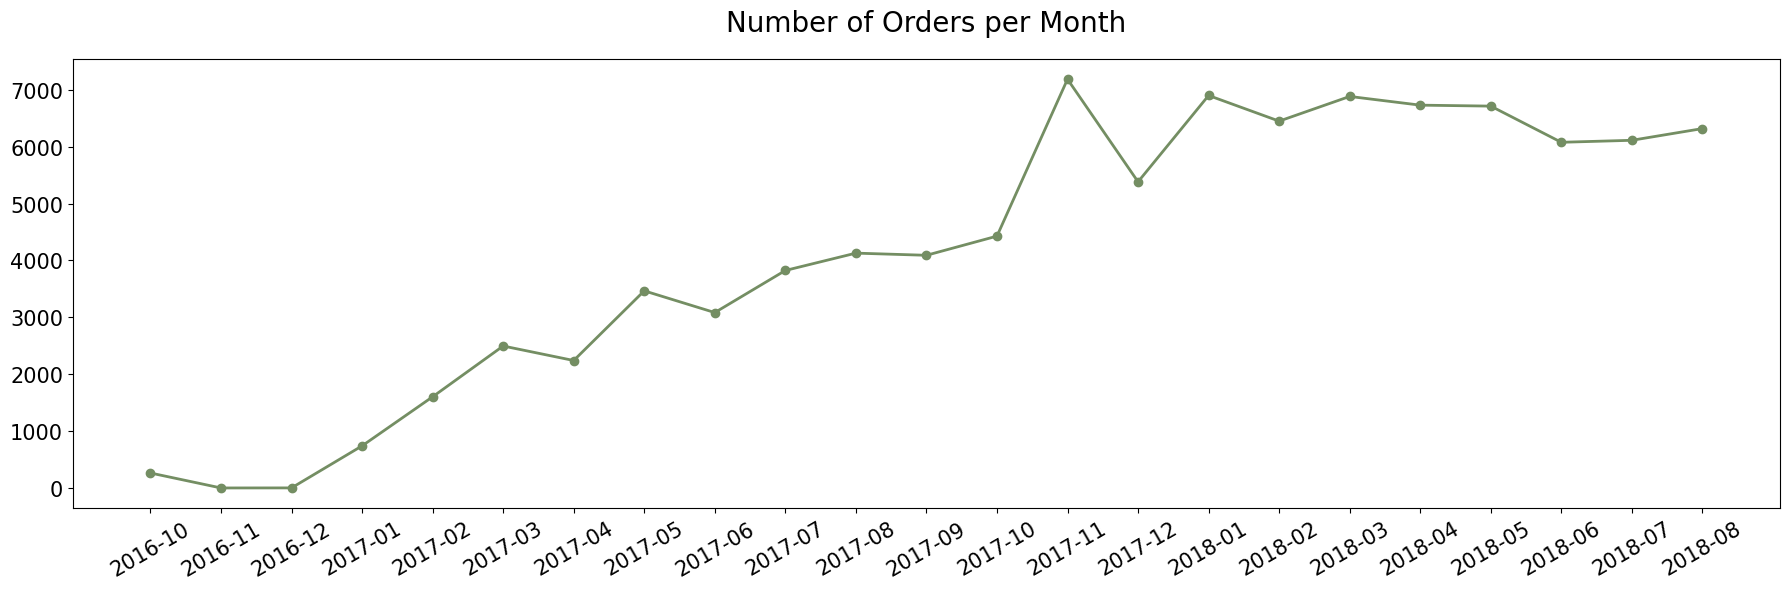

In [185]:
plt.figure(figsize=(18, 6))
plt.plot(
    monthly_orders_df.index,
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#748E63"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20, pad=20)
labels, locations = plt.yticks()
plt.xticks(rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

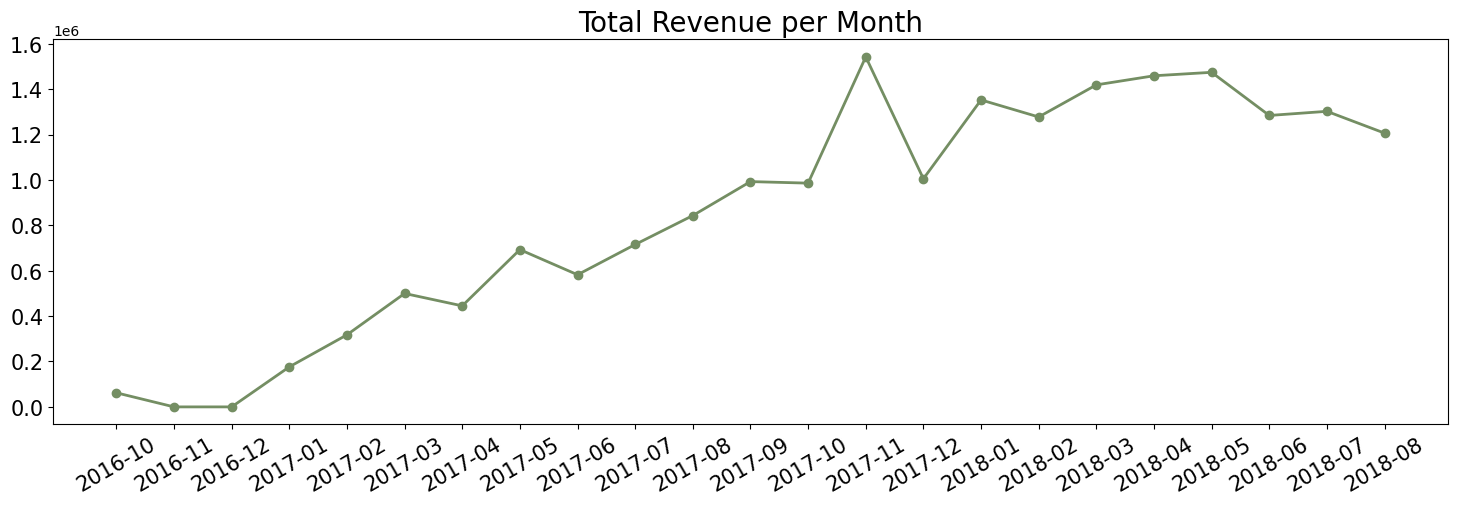

In [186]:
plt.figure(figsize=(18, 5))
plt.plot(
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#748E63"
)
plt.title("Total Revenue per Month", loc="center", fontsize=20)
plt.xticks(rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Pertanyaan 2:

> Produk apa yang paling banyak dan paling sedikit terjual?

In [187]:
merge_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delay_time,total_time,prepare_time,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,False,-11 days +10:35:35,8 days 19:13:23,6 days 19:25:45,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,Recomendo,Recomendo,2017-05-26 00:00:00,2017-05-30 22:34:40,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture
1,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,True,1 days 17:58:51,25 days 01:39:41,21 days 22:11:50,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,Recomendo,Recomendo,2018-06-15 00:00:00,2018-06-15 12:10:59,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture
2,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,False,-13 days +16:04:25,14 days 22:35:06,14 days 05:53:23,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,Recomendo,Recomendo,2018-03-29 00:00:00,2018-04-02 18:36:47,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture
3,997fd4b37386d10b57d4ac8cdec011a6,4c06b42fbf7b97ab10779cda5549cd1c,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16,False,-8 days +19:42:53,31 days 09:12:38,17 days 04:41:45,1.0,credit_card,6.0,315.75,1.0,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-07-26 10:30:15,199.98,115.77,moveis_escritorio,43.0,1128.0,1.0,16133.0,63.0,59.0,25.0,2518803238cabbf63564593e4a8fc52d,1.0,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09 00:00:00,2018-08-14 11:40:54,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture
4,b63fff1ef8b6201df68bb611ee41129e,8276de07ef25225d412b8462d73f8664,delivered,2017-04-02 22:15:27,2017-04-04 05:55:19,2017-04-13 16:28:06,2017-05-02 13:53:25,2017-05-08,False,-6 days +13:53:25,28 days 07:58:06,9 days 10:32:47,1.0,boleto,1.0,146.21,1.0,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,2017-04-17 05:55:19,129.60,16.61,moveis_escritorio,41.0,154.0,1.0,2600.0,40.0,45.0,39.0,84467f1766775ba4c14fc25b3ca67905,4.0,Recomendo,"A crítica é à entrega, pois por se tratar dos ...",2017-05-03 00:00:00,2017-05-03 21:06:33,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture


In [188]:
sum_items_df = merge_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()
sum_items_df.rename(columns={"product_category_name_english": "product_category", "order_id":"count"}, inplace=True)
sum_items_df.head(11)

,product_category,count
0,bed_bath_table,9272
1,health_beauty,8646
2,sports_leisure,7530
3,computers_accessories,6530
4,furniture_decor,6307
5,housewares,5743
6,watches_gifts,5495
7,telephony,4093
8,auto,3810
9,toys,3804


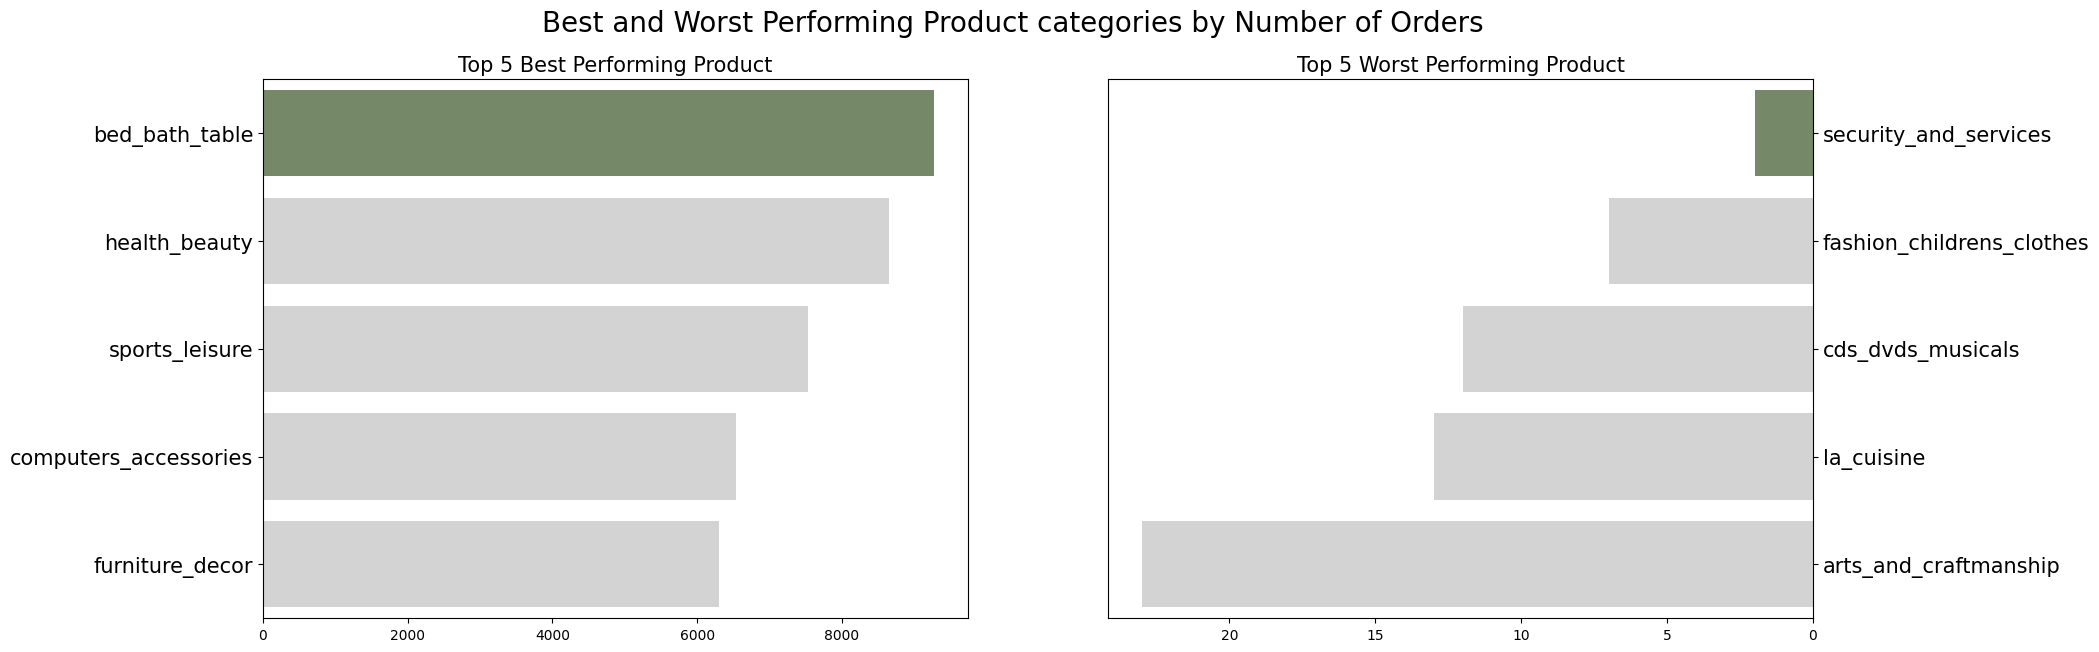

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

colors = ["#748E63", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count", y="product_category", data=sum_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="count", y="product_category", data=sum_items_df.sort_values(by="count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product categories by Number of Orders", fontsize=20)
plt.show()

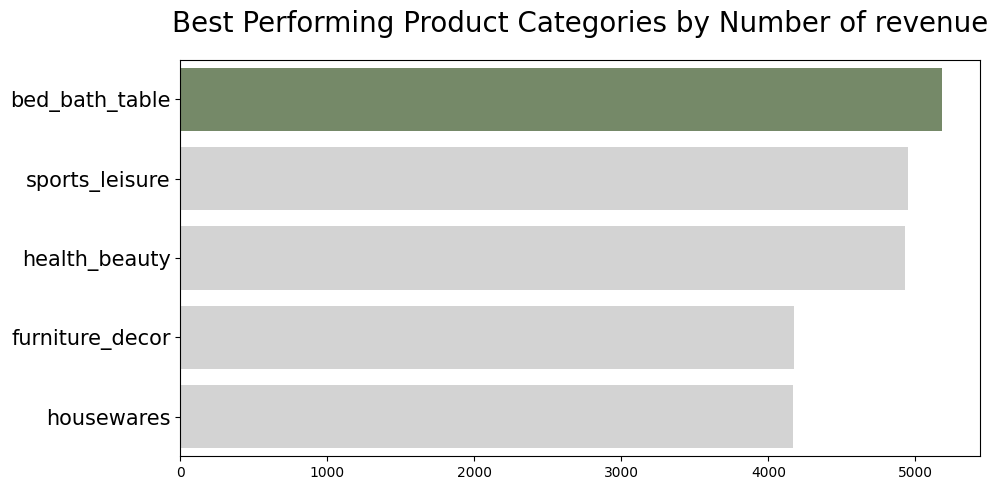

In [190]:
product_by_payment = merge_df.groupby("product_category_name_english").payment_value.nunique().sort_values(ascending=False).reset_index()
product_by_payment.rename(columns={"product_category_name_english": "product_category", "payment_value":"count"}, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x="count", y="product_category", data=product_by_payment.head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Best Performing Product Categories by Number of revenue", loc="center", fontsize=20, pad=20)
plt.tight_layout()
plt.show()

### Pertanyaan 3:

> Berdasarkan kota bagian mana yang menghasilkan pendapatan tertinggi?


In [191]:
merge_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delay_time,total_time,prepare_time,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,False,-11 days +10:35:35,8 days 19:13:23,6 days 19:25:45,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,Recomendo,Recomendo,2017-05-26 00:00:00,2017-05-30 22:34:40,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture
1,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,True,1 days 17:58:51,25 days 01:39:41,21 days 22:11:50,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,Recomendo,Recomendo,2018-06-15 00:00:00,2018-06-15 12:10:59,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture
2,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,False,-13 days +16:04:25,14 days 22:35:06,14 days 05:53:23,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,Recomendo,Recomendo,2018-03-29 00:00:00,2018-04-02 18:36:47,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture
3,997fd4b37386d10b57d4ac8cdec011a6,4c06b42fbf7b97ab10779cda5549cd1c,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16,False,-8 days +19:42:53,31 days 09:12:38,17 days 04:41:45,1.0,credit_card,6.0,315.75,1.0,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-07-26 10:30:15,199.98,115.77,moveis_escritorio,43.0,1128.0,1.0,16133.0,63.0,59.0,25.0,2518803238cabbf63564593e4a8fc52d,1.0,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09 00:00:00,2018-08-14 11:40:54,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture
4,b63fff1ef8b6201df68bb611ee41129e,8276de07ef25225d412b8462d73f8664,delivered,2017-04-02 22:15:27,2017-04-04 05:55:19,2017-04-13 16:28:06,2017-05-02 13:53:25,2017-05-08,False,-6 days +13:53:25,28 days 07:58:06,9 days 10:32:47,1.0,boleto,1.0,146.21,1.0,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,2017-04-17 05:55:19,129.60,16.61,moveis_escritorio,41.0,154.0,1.0,2600.0,40.0,45.0,39.0,84467f1766775ba4c14fc25b3ca67905,4.0,Recomendo,"A crítica é à entrega, pois por se tratar dos ...",2017-05-03 00:00:00,2017-05-03 21:06:33,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture


In [192]:
bycity_df = merge_df.groupby(by="customer_city").agg({"customer_id":"nunique", "payment_value":"sum"}).sort_values(ascending=False, by="payment_value").reset_index()
bycity_df.rename(columns={
    "customer_id": "count",
    "customer_city":"city",
    "payment_value":"revenue"
}, inplace=True)
bycity_df

,city,count,revenue
0,sao paulo,14810,2743602.99
1,rio de janeiro,6495,1512107.48
2,belo horizonte,2649,485497.45
3,brasilia,2042,419446.49
4,curitiba,1474,321718.71
...,...,...,...
4068,santo antonio do rio abaixo,1,24.23
4069,tamboara,1,24.09
4070,jenipapo de minas,1,22.58
4071,polo petroquimico de triunfo,1,20.70


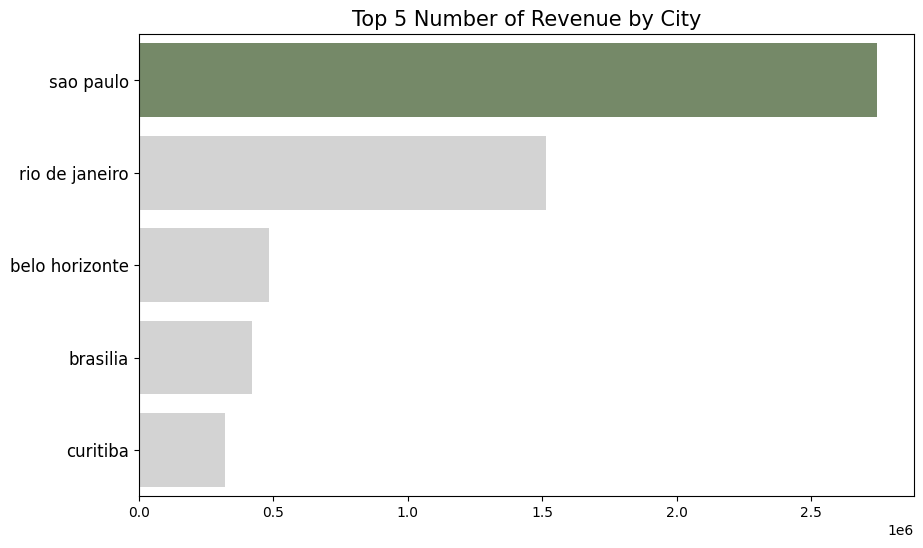

In [193]:
plt.figure(figsize=(10, 6))
colors = ["#748E63", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="revenue",
    y="city",
    data=bycity_df.head(),
    palette=colors
)
plt.title("Top 5 Number of Revenue by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4:

> Metode pembayaran apa yang paling umum digunakan oleh pelanggan?

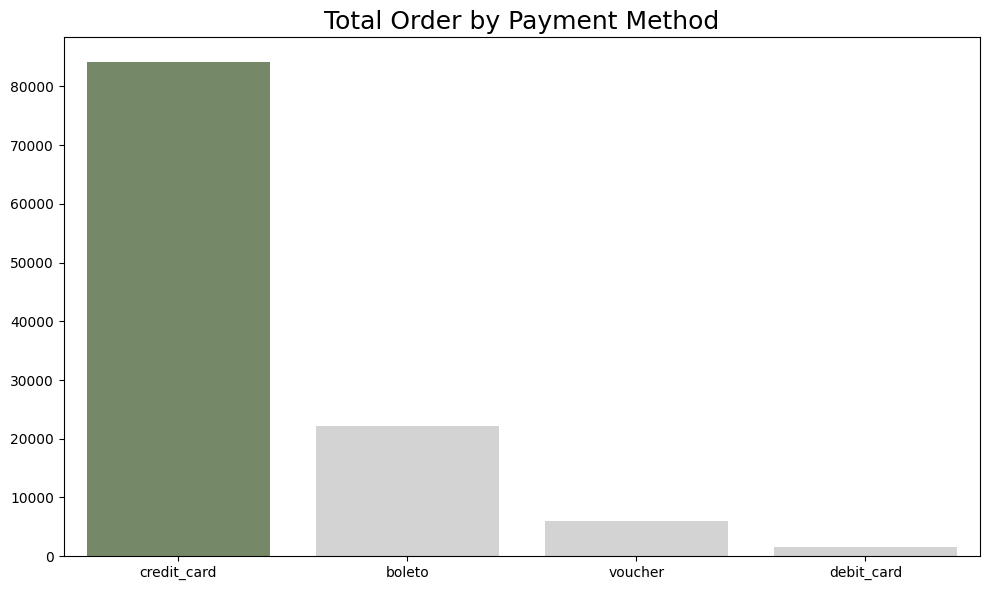

In [194]:
plt.figure(figsize=(10,6))
colors = ["#748E63", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.countplot(data=merge_df, x="payment_type", palette=colors)
plt.title('Total Order by Payment Method', fontsize=18)
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

### Pertanyaan 5:

> Bagaimana distribusi dari review score?

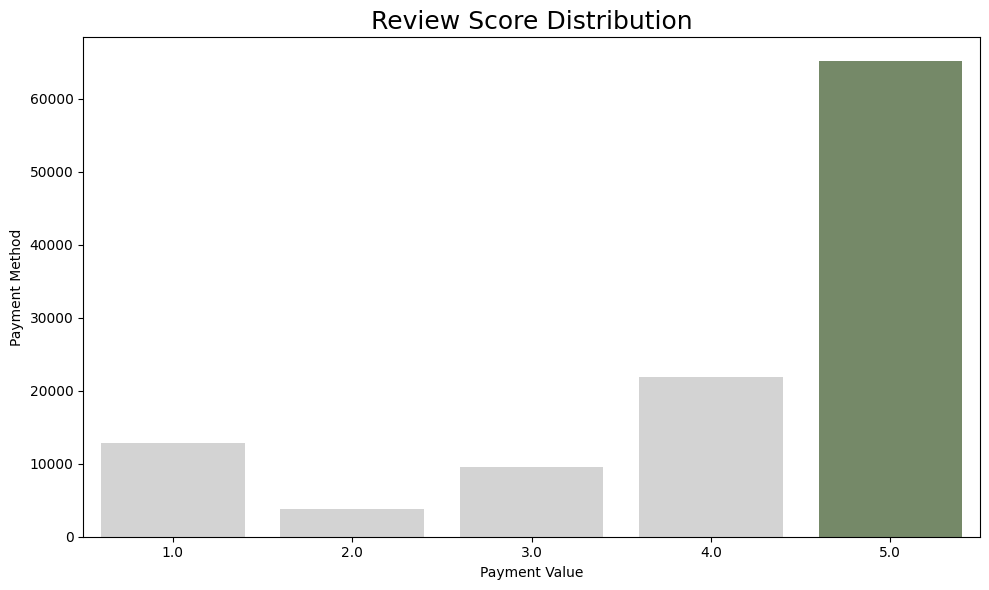

In [195]:
fig, ax = plt.subplots(figsize=(10,6))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#748E63"]
sns.countplot(data=merge_df, x="review_score", palette=colors, ax=ax)
ax.set_title('Review Score Distribution', fontsize=18)
ax.set_xlabel('Payment Value',  fontdict={'fontsize':10})
ax.set_ylabel('Payment Method', fontdict={'fontsize':10})

fig.tight_layout()

fig.show()

####RFM Analysis

In [196]:
rfm_df = merge_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89


In [197]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = merge_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19,114
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89,288


In [198]:
rfm_df.describe()

,frequency,monetary,recency
count,92078.000000,92078.000000,92078.000000
mean,1.033102,213.230658,236.793121
std,0.206887,647.738068,152.582089
min,1.000000,9.590000,0.000000
25%,1.000000,63.920000,113.000000
50%,1.000000,112.955000,218.000000
75%,1.000000,203.087500,345.000000
max,14.000000,109312.640000,695.000000


In [199]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_unique_id,max_order_timestamp,frequency,monetary,recency
1489,0421e7a23f21e5d54efed456aedbc513,2018-08-29,1,119.42,0
89255,f80013faf776e37bcea7634d59c2181e,2018-08-29,1,74.21,0
46102,7febafa06d9d8f232a900a2937f04338,2018-08-29,1,61.29,0
13254,24ac2b4327e25baf39f2119e4228976a,2018-08-29,1,93.75,0
65162,b4dcade04bc548b7e3b0243c801f8c26,2018-08-29,1,106.95,0


In [200]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_unique_id,max_order_timestamp,frequency,monetary,recency
50739,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20,14,797.38,9
22478,3e43e6105506432c953e165fb2acf44c,2018-02-27,9,1963.58,183
72928,ca77025e7201e3b30c44b472ff346268,2018-06-01,7,2126.44,89
9929,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14,7,1386.54,196
36210,6469f99c1f9dfae7733b25662e7f1782,2018-06-28,7,973.09,62


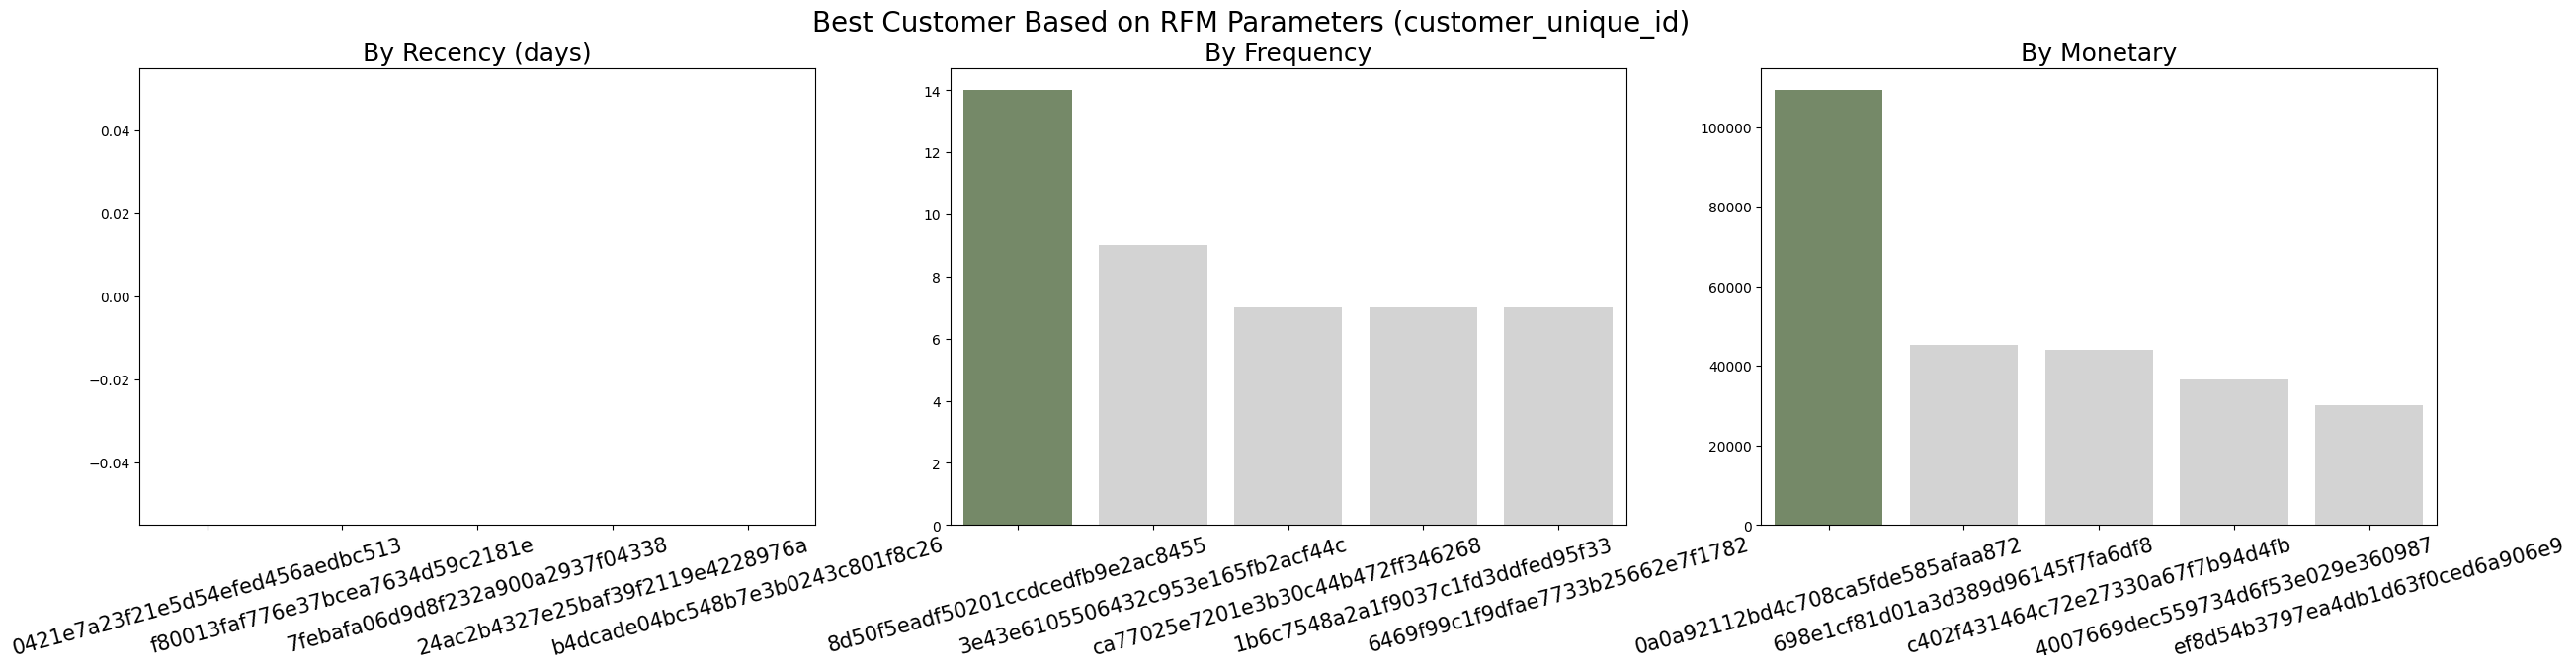

In [210]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#748E63", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=15)

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=15)

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [202]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90,111,69788.0,44668.5,55646.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19,114,68831.5,44668.5,1990.5
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22,537,3161.5,44668.5,35095.5
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62,321,26206.5,44668.5,11168.5
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89,288,30837.5,44668.5,68123.5


In [203]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90,111,75.796379,48.511588,60.434088
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19,114,74.757529,48.511588,2.161754
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22,537,3.433688,48.511588,38.114968
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62,321,28.462742,48.511588,12.129390
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89,288,33.492446,48.511588,73.984557


In [204]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_unique_id', 'RFM_score']].head(7)

,customer_unique_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2.97
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.30
2,0000f46a3911fa3c0805444483337064,1.79
3,0000f6ccb0745a6a4b88665a16c9f078,1.24
4,0004aac84e0df4da2b147fca70cf8255,3.04
5,0004bd2a26a76fe21f786e4fbd80607f,3.11
6,00050ab1314c0e55a6ca13cf7181fecf,1.40


Segmentasi customer berdasarkan RFM_score

In [205]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_unique_id', 'RFM_score', 'customer_segment']].head(20)

,customer_unique_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2.97,Low value customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.30,lost customers
2,0000f46a3911fa3c0805444483337064,1.79,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.24,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.04,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,3.11,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.40,lost customers
7,00053a61a98854899e70ed204dd4bafe,3.87,Medium value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.50,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.75,Low value customers


In [206]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df

,customer_segment,customer_unique_id
0,High value customer,2548
1,Low value customers,44404
2,Medium value customer,26942
3,Top customers,487
4,lost customers,17697


In [207]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

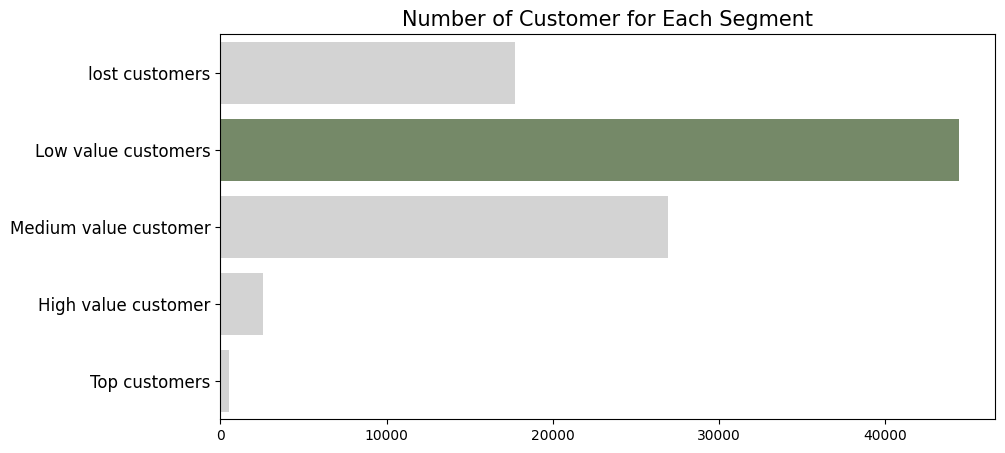

In [208]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#748E63", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_unique_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- **Conclusion pertanyaan 1:**
Berdasarkan tren, penjualan cenderung meningkat dari 2016 ke 2017. Pada awal 2018, penjualan tumbuh stabil. Strategi pemasaran di bulan Oktober–November 2017 dapat dijadikan acuan untuk melakukan promosi karena pada saat itu, penjualan meningkat drastis.

- **Conclusion pertanyaan 2:** Berdasarkan kategori produk, kategori "Bed Bath Table" dan "Health Beauty" menempati posisi teratas dalam hal penjualan, sedangkan untuk terendahnya ada di kategori "Security and Service". Kedua kategori teratas ini dapat digunakan sebagai opsi untuk strategi upselling atau cross-selling.

- **Conclusion pertanyaan 3:** Berdasarkan hasil penjualan, sebagian besar pelanggan kami berlokasi di Sao Paulo, untuk mendapatkan keuntungan maksimal kita dapat berinvestasi di lebih banyak cabang toko.

- **Conclusion pertanyaan 4:** Berdasarkan metode pembayaran, "kartu kredit" adalah pilihan yang paling disukai oleh pelanggan dan memiliki nilai pembayaran rata-rata tertinggi. Mungkin promo atau kerjasama dengan "kartu kredit" bisa diberikan untuk mendapatkan keuntungan lain jika kita melakukan pembayaran dengan "kartu kredit", agar pelanggan lebih tertarik melakukan pembayaran menggunakan "kartu kredit".

- **Conclusion pertanyaan 5:** Berdasarkan review skor yang diberikan oleh pelanggan, sekitar 60000 order atau 57,8% pelanggan memberikan skor 5. Ini cukup baik, tetapi juga perlu untuk mengetahui mengapa pelanggan memberikan review di bawah 5.

In [209]:
merge_df.to_csv("merge_data.csv", index=False)